In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# We'll use only 2 features for 2D visualization
X = X[['sepal length (cm)', 'petal length (cm)']]

In [4]:
# Scale the data (important for distance-based algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

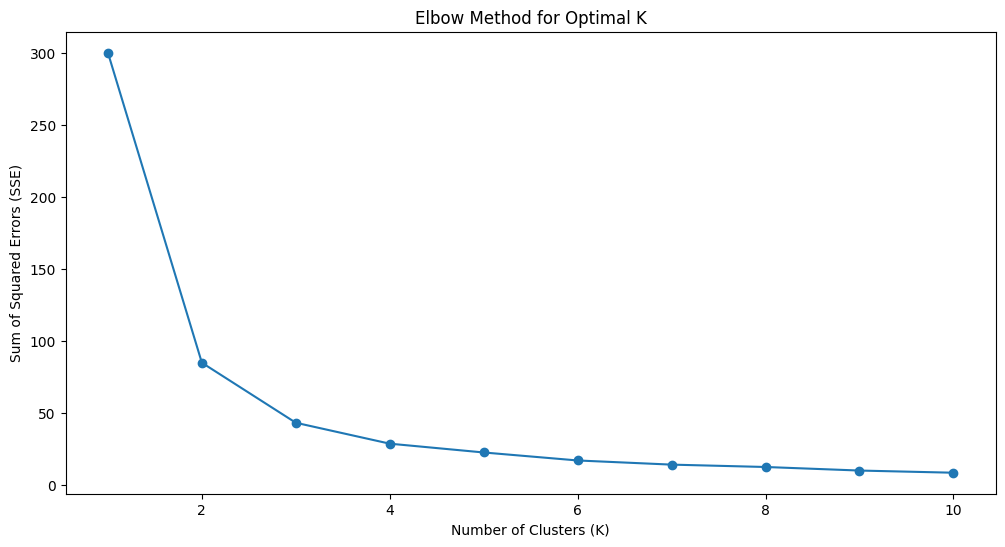

In [5]:
# Elbow Method to find optimal K
sse = []  

K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(12, 6))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

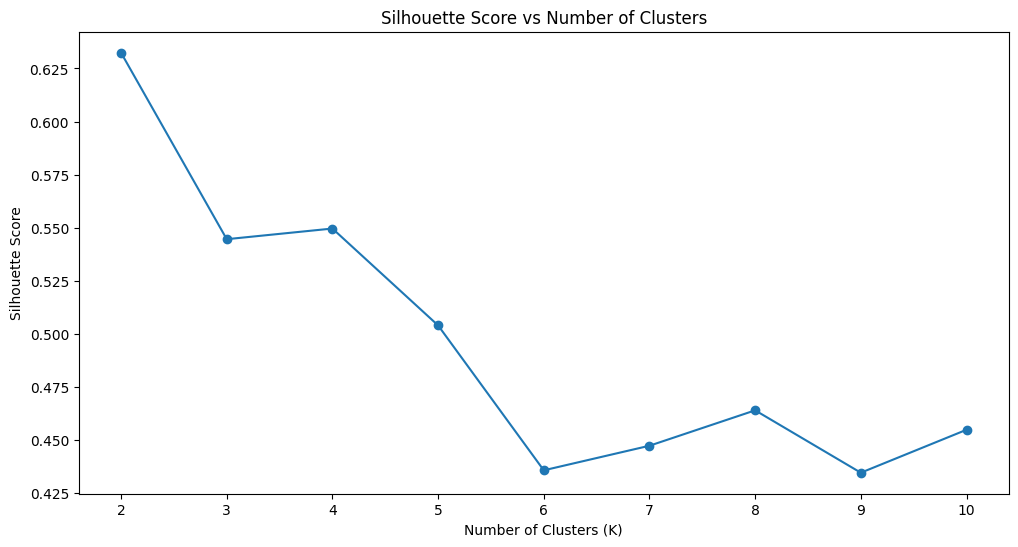

Best K according to Silhouette Score: 2


In [6]:
# Silhouette Score for different K values
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

# Find the best K based on Silhouette Score
best_k = np.argmax(sil_scores) + 2  # +2 because we started from k=2
print(f"Best K according to Silhouette Score: {best_k}")

In [7]:
# Final K-Means with best K=2
final_kmeans = KMeans(n_clusters=2, n_init=10)
y_kmeans = final_kmeans.fit_predict(X_scaled)

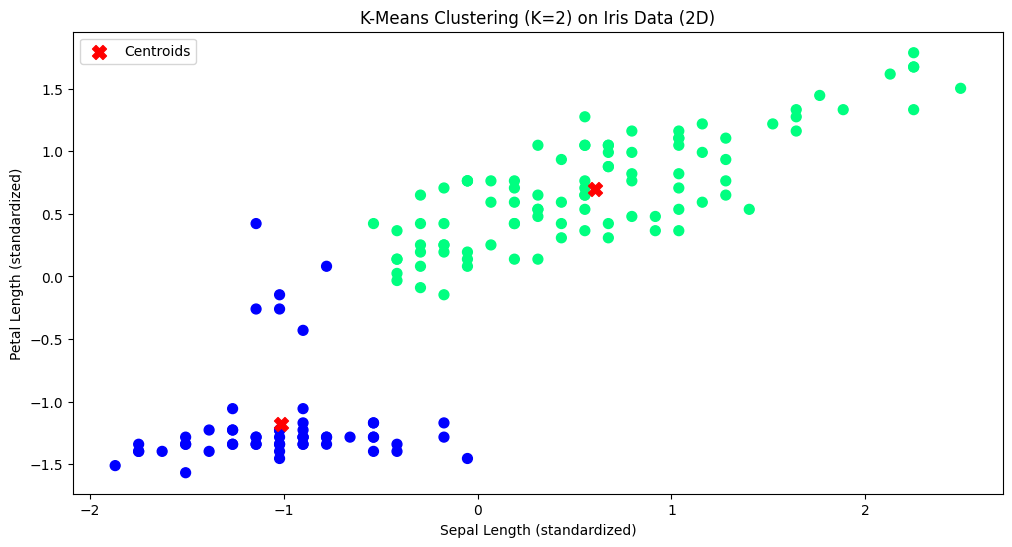

In [8]:
# Visualize the clusters in 2D
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='winter', s=50)
plt.scatter(final_kmeans.cluster_centers_[:, 0],
            final_kmeans.cluster_centers_[:, 1],
            s=100, c='red', marker='X', label='Centroids')
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Petal Length (standardized)')
plt.title(f'K-Means Clustering (K={best_k}) on Iris Data (2D)')
plt.legend()
plt.show()